/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator


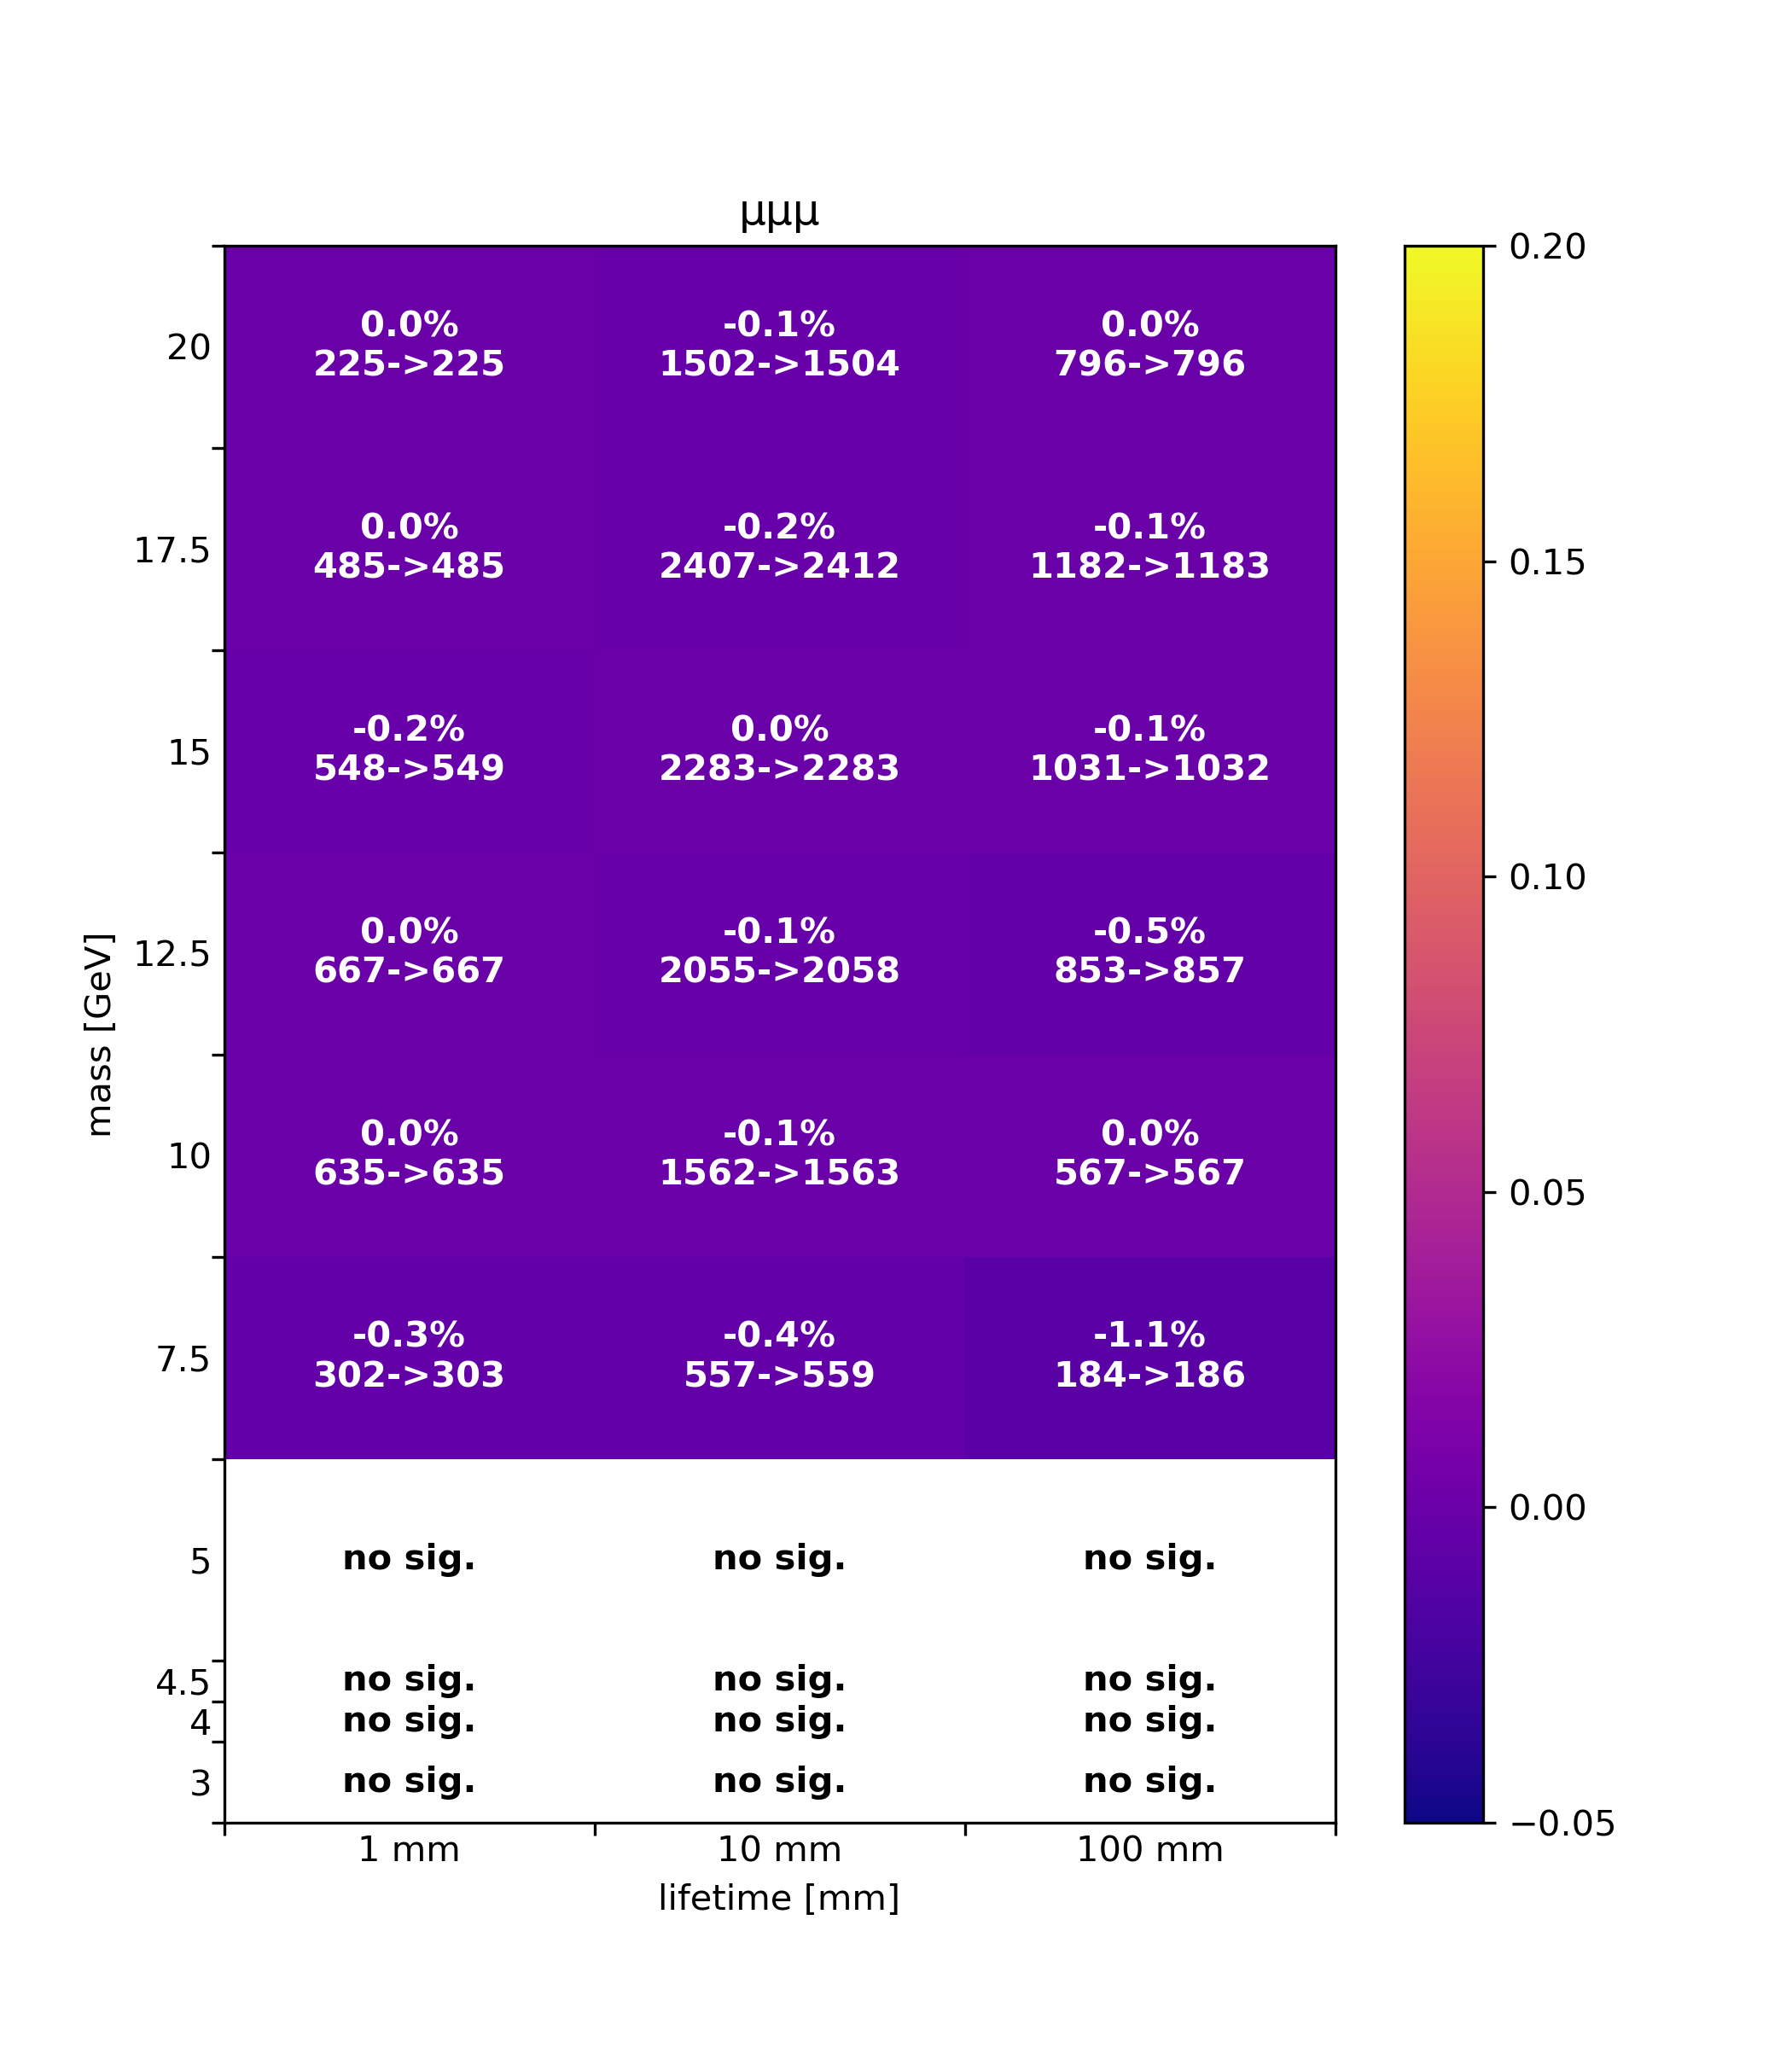

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator


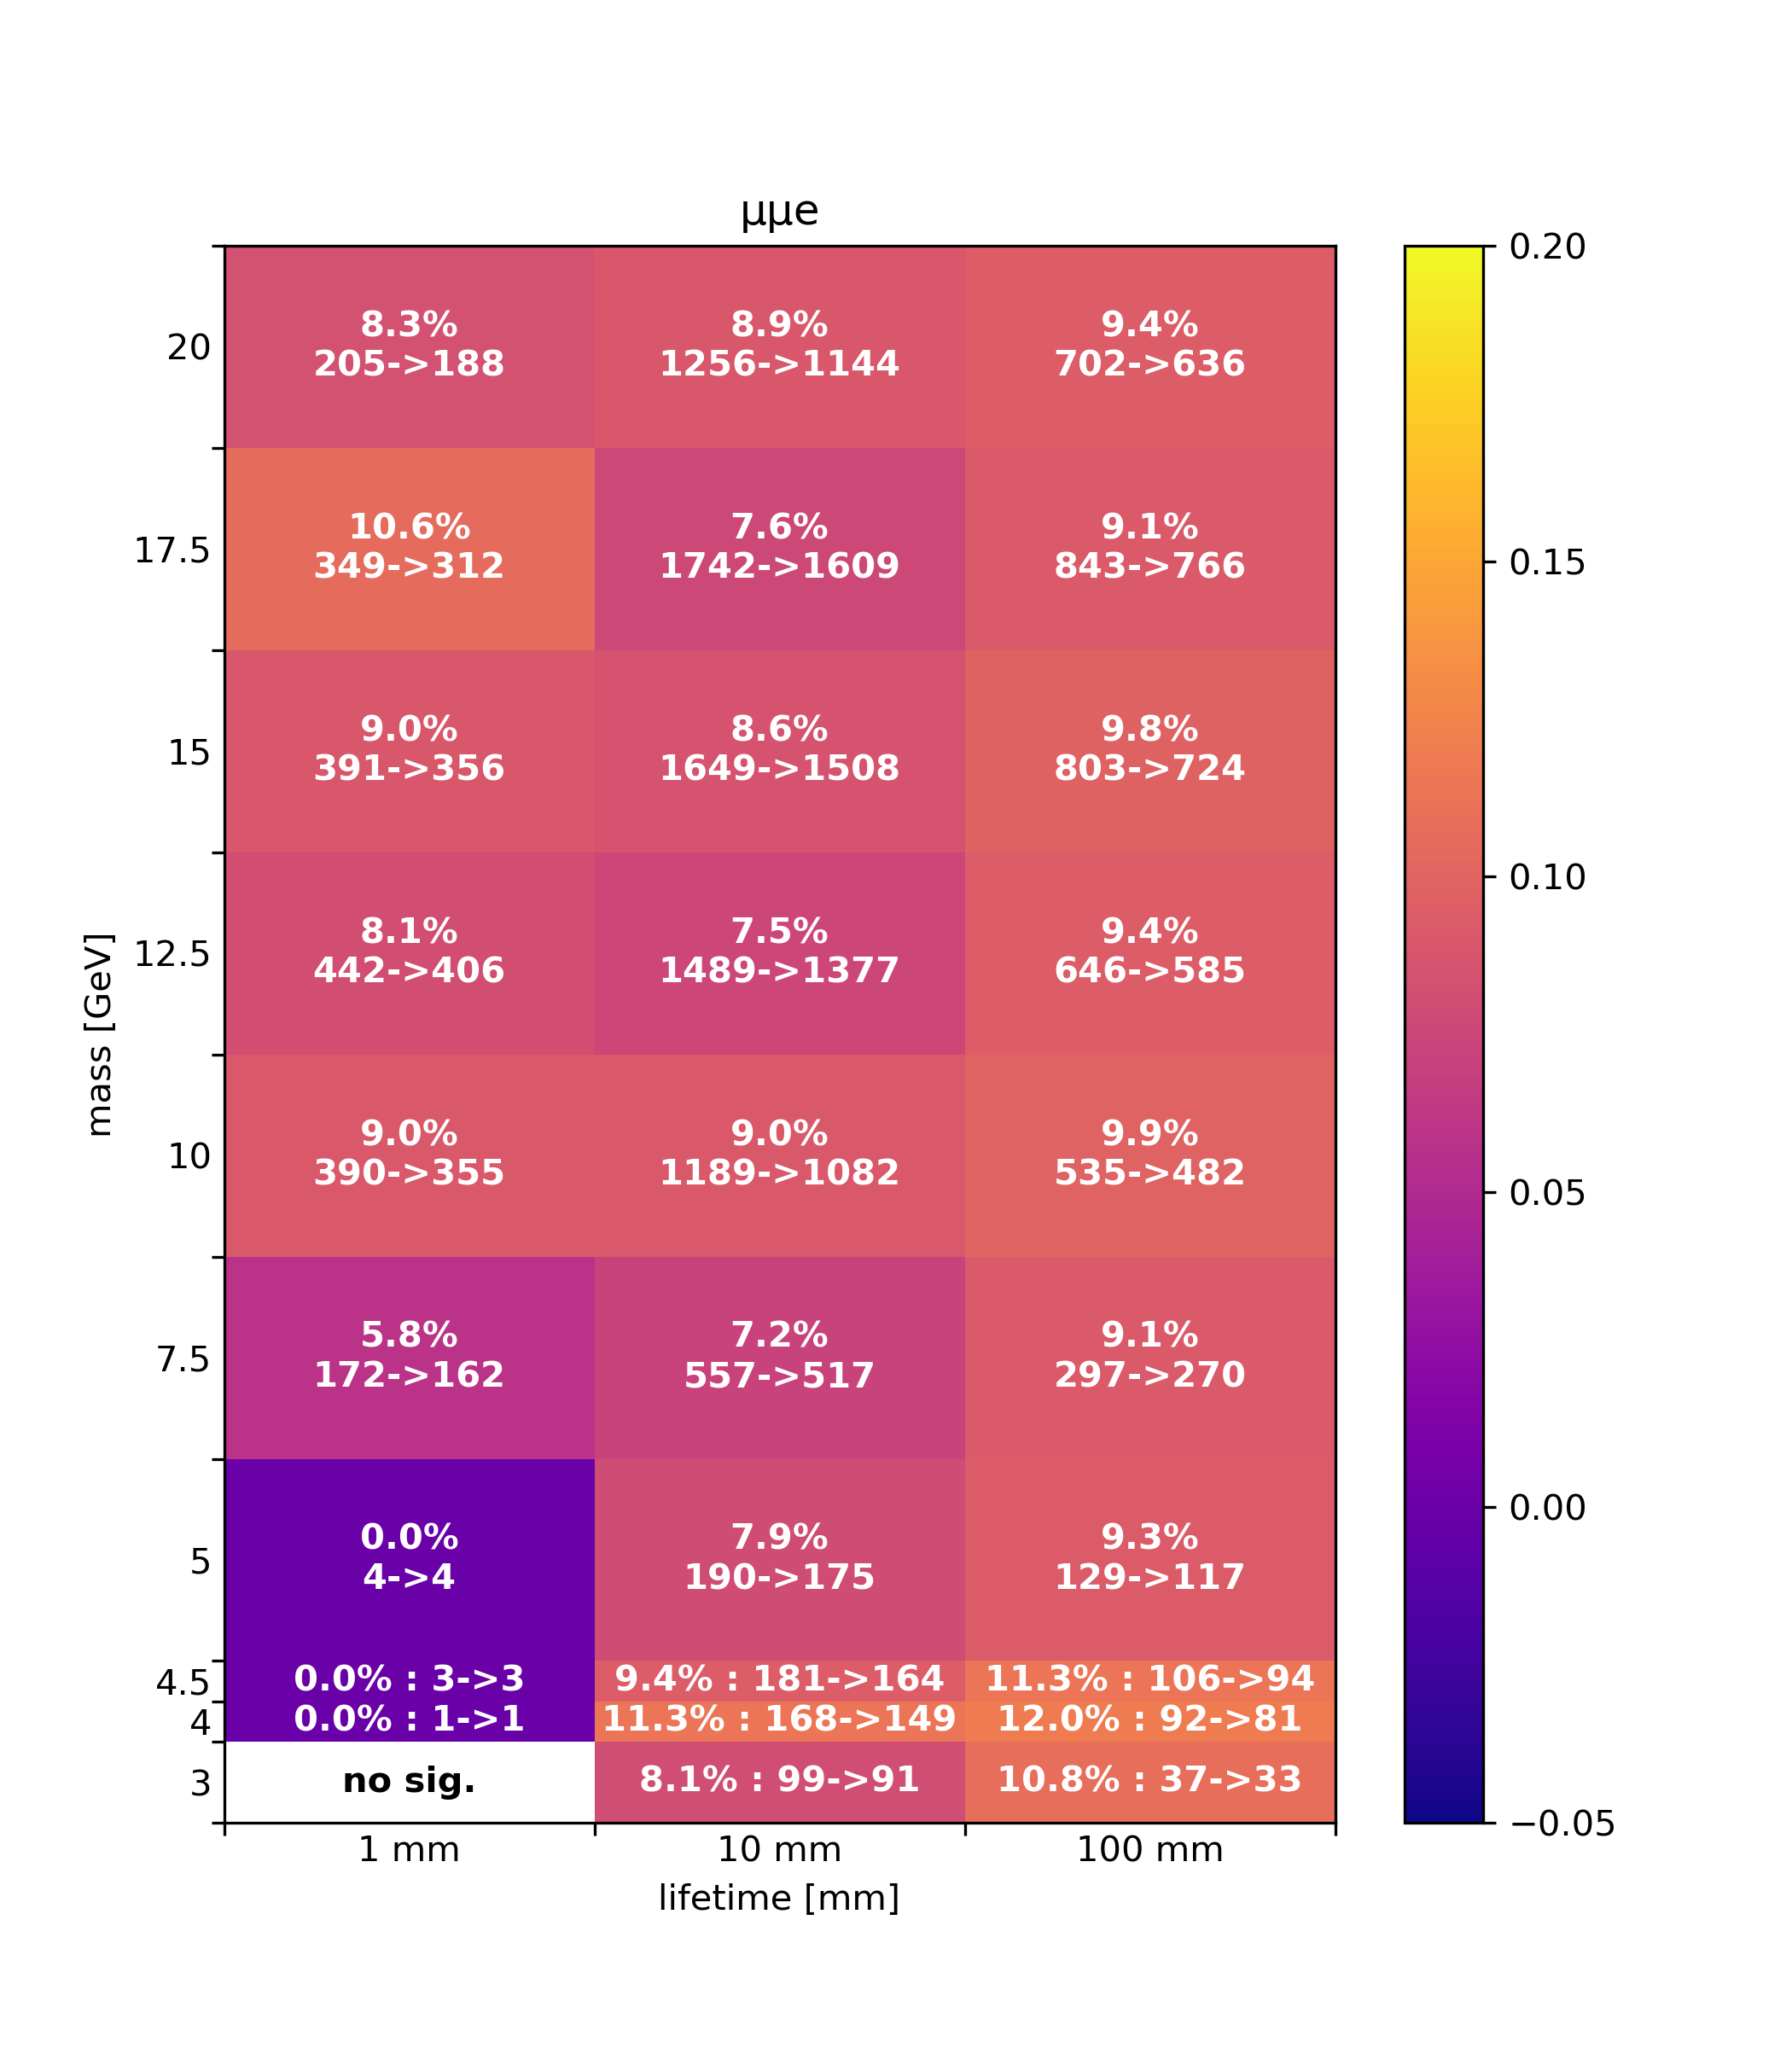

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator


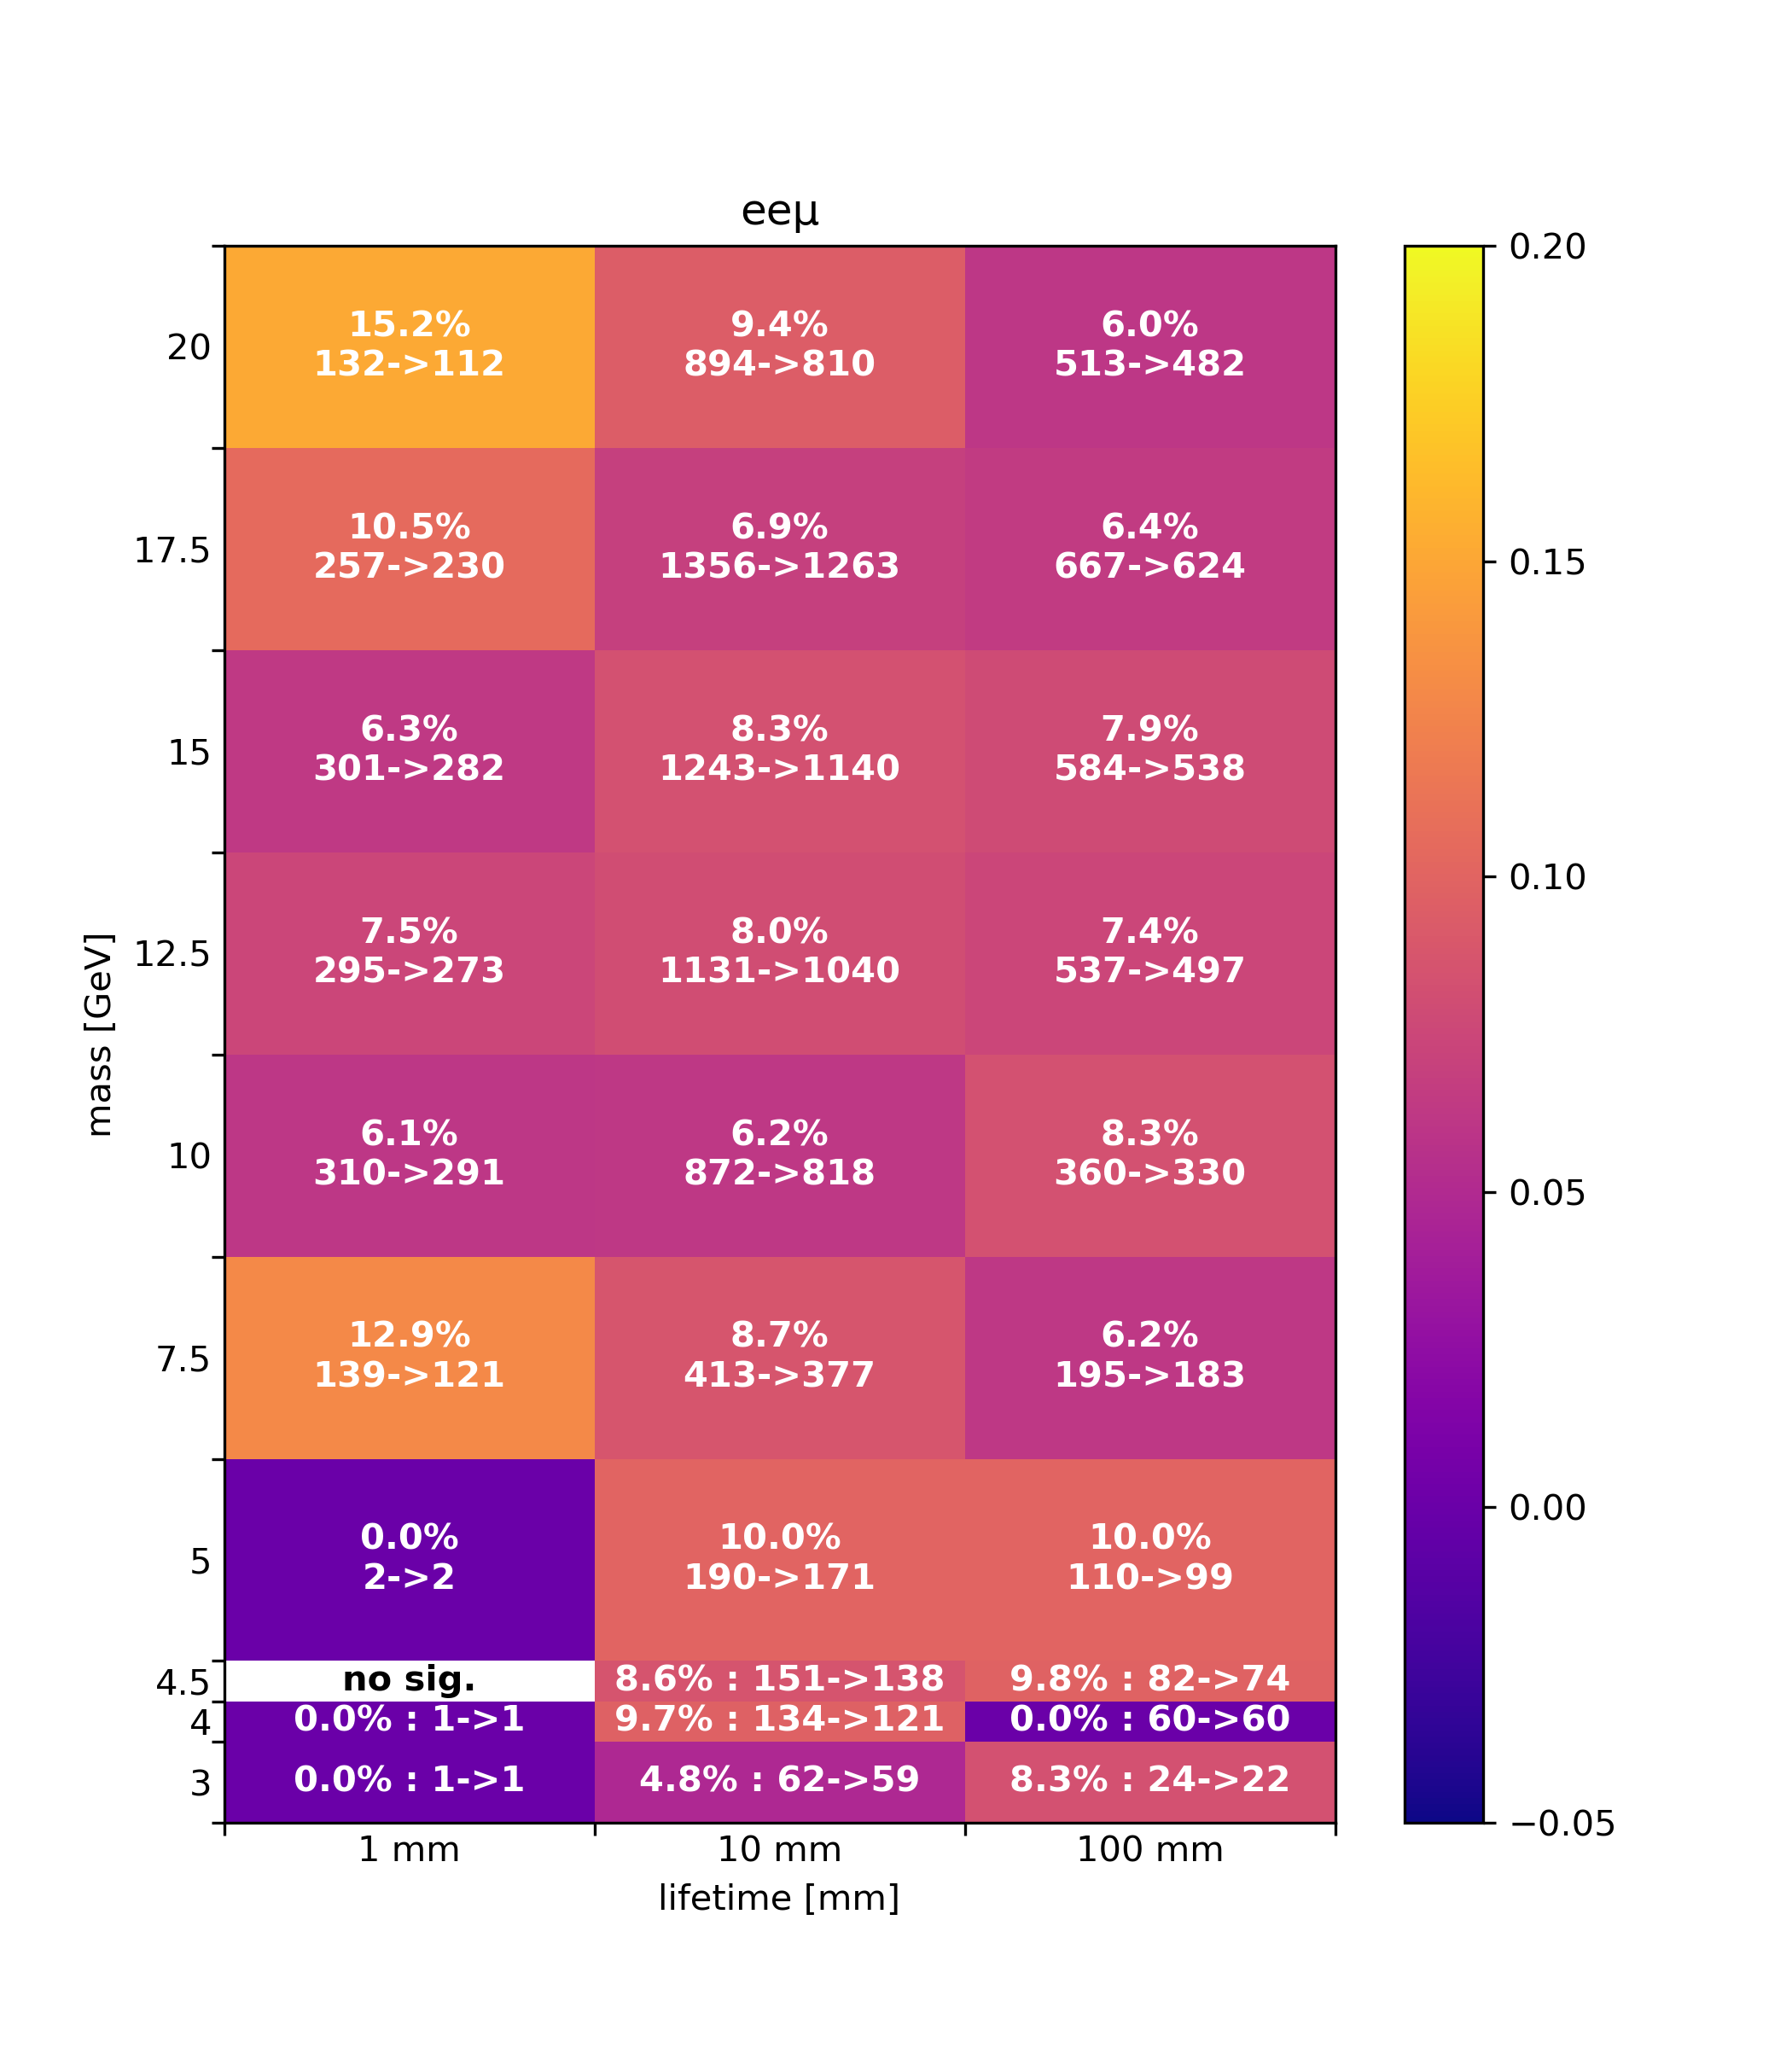

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator


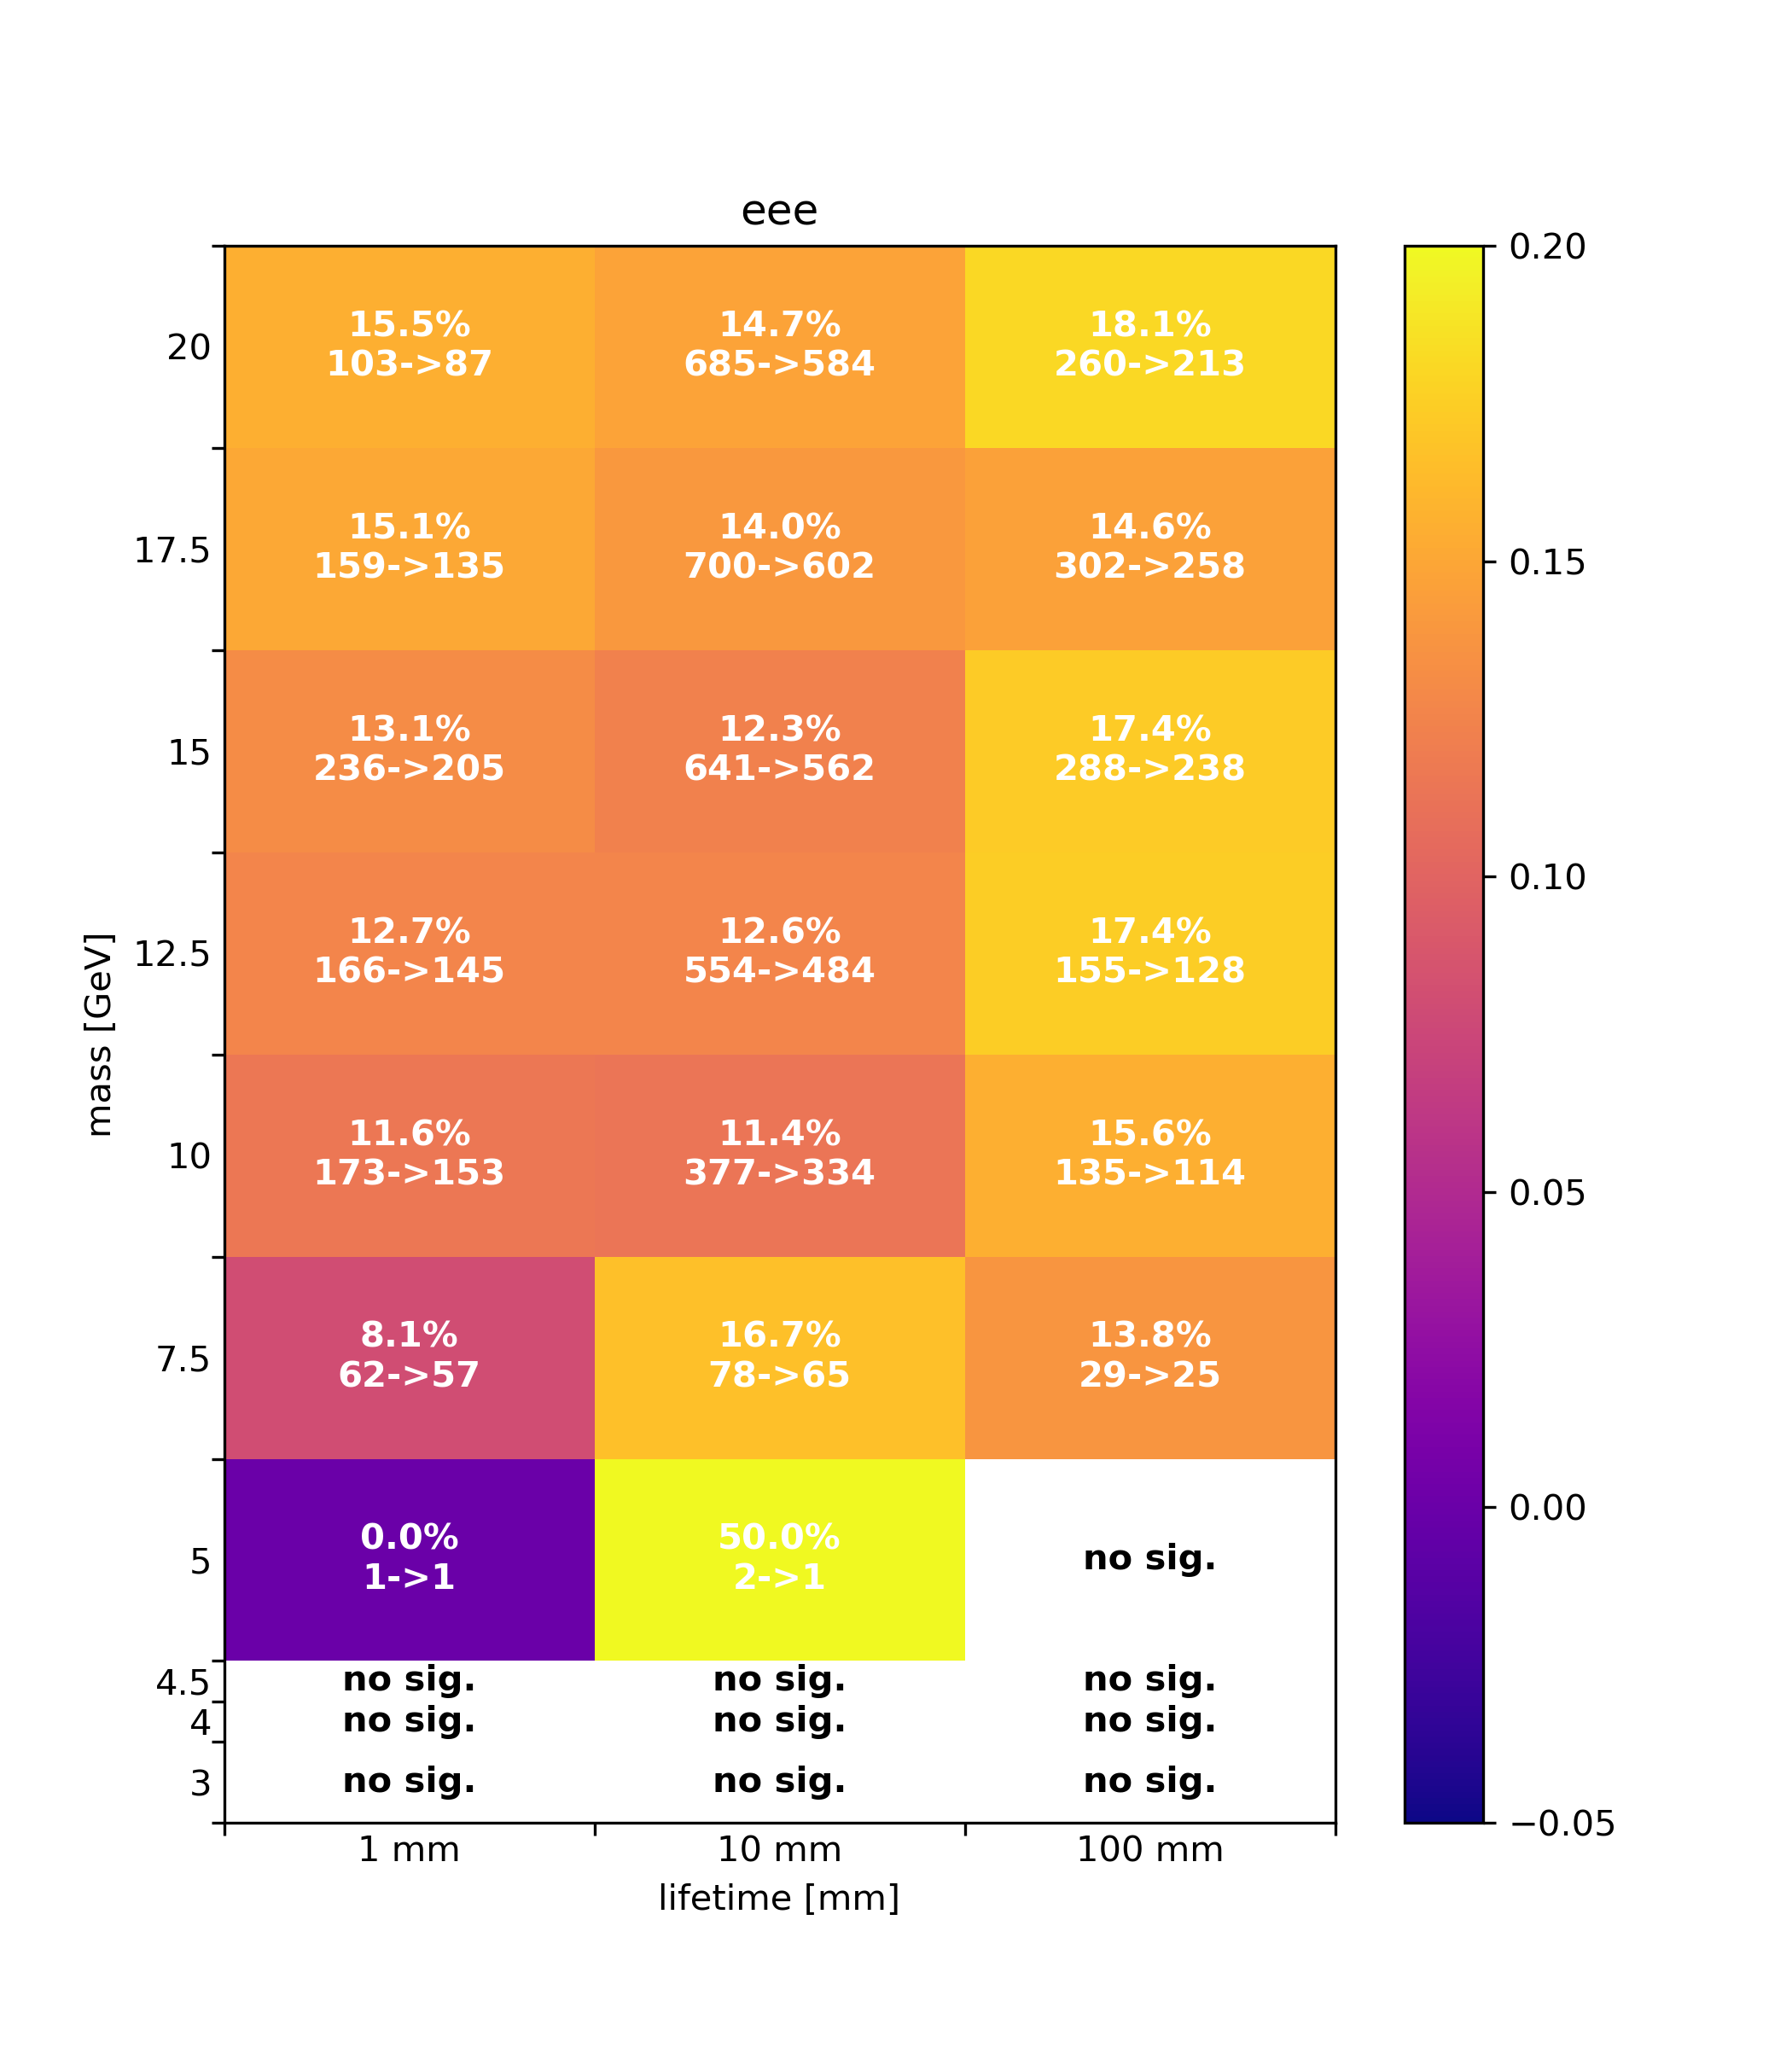

In [21]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image


masses = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
lifetimes = {1:0, 10:1, 100:2}

def set_bin_content(mass, lifetime, value, arr):
    ybin = np.max(np.digitize(mass, masses)-1, 0)
    xbin = lifetimes[lifetime]
    arr[ybin,xbin] = value

def make_uncertainty_plot(histpath, title, outfile):

    count_arr = np.array([
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    ])

    count_arr_v6 = np.array(count_arr)
    count_arr_v5 = np.array(count_arr)
    diff_arr = np.array(count_arr)

    # get bins from ntuples    
    for hist_file in glob.glob(histpath):

        f_fullrun2_v6 = uproot.open(hist_file)
        f_fullrun2_v5 = uproot.open(hist_file.replace('v6p0_histograms','v5p4_histograms'))
        count_v6 = -100
        count_v5 = -100
        try:
            count_v6 = len(f_fullrun2_v6['VSI_LeptonsMod_ntuples_LNC_plus_LNV_mHNL']['HNLm'])
        except:
            pass
        try:
            count_v5 = len(f_fullrun2_v5['VSI_LeptonsMod_ntuples_LNC_plus_LNV_mHNL']['HNLm'])
        except:
            pass

        tokens = hist_file.split('/')[5].split('_')
        file_lifetime = int(tokens[3].split('mm')[0])
        file_mass = float(tokens[2][:-1].replace('p','.'))

        set_bin_content(file_mass, file_lifetime, count_v6, count_arr_v6)
        set_bin_content(file_mass, file_lifetime, count_v5, count_arr_v5)

        diff = np.nan
        if count_v5 >= 0:
            diff = (count_v5-count_v6)/count_v5
        set_bin_content(file_mass, file_lifetime, diff, diff_arr)

    # do the plotting
    plot_uncertainties(count_arr_v6, count_arr_v5, diff_arr, title, outfile)
    return count_arr_v6, count_arr_v5, diff_arr

def plot_uncertainties(count_arr_v6, count_arr_v5, diff_arr, title, outfile):
    plt.figure(figsize=[7,8])
    plt.pcolormesh([0,1,2,3], masses, diff_arr, vmin=-.05, vmax=.2, cmap='plasma')
    plt.colorbar()
    ax = plt.gca()

    # mess with x ticks
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels('')
    ax.set_xticklabels(['1 mm', '10 mm', '100 mm',], minor=True)
    ax.set_xticks([0.5,1.5,2.5,], minor=True)
    ax.tick_params(axis='both', which='minor', length=0)

    # mess with y ticks
    ax.set_yticks(masses)
    ax.set_yticklabels('')
    ax.tick_params(which='minor', length=0)
    ax.set_yticks(masses[:-1] + np.diff(masses)/2, minor=True)
    ax.set_yticklabels(masses[:-1], minor=True)

    ax.set_title(title)
    ax.set_xlabel('lifetime [mm]')
    ax.set_ylabel('mass [GeV]')

    # set text
    for i in range(len(masses)-1):
        for j in range(len(lifetimes)):
            yloc = j+.5
            xloc = masses[i] + (masses[i+1]-masses[i])/2
            if not np.isnan(diff_arr[i,j]):
                delim = '\n' if masses[i] >= 5 else ' : '
                text = f'{diff_arr[i,j]:0.1%}{delim}{int(count_arr_v5[i,j])}->{int(count_arr_v6[i,j])}' 
                ax.text(yloc, xloc , text,
                        ha="center", va="center", color="white", fontweight='bold', transform=ax.transData)
            else:
                text = 'no sig.'
                ax.text(yloc, xloc , text,
                    ha="center", va="center", color="black", fontweight='bold', transform=ax.transData)


    plt.savefig('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/ntuple_comparison/plots/png/'+outfile+'.png', dpi=300)
    plt.savefig('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/ntuple_comparison/plots/pdf/'+outfile+'.pdf', dpi=300)

a =make_uncertainty_plot(histpath='/data/hnl/histograms/v6p0_histograms/histograms_fullrun2_*_uuu.root', title='μμμ', outfile='compare_uuu')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/ntuple_comparison/plots/png/compare_uuu.png'));

make_uncertainty_plot(histpath='/data/hnl/histograms/v6p0_histograms/histograms_fullrun2_*_uue.root', title='μμe', outfile='compare_uue')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/ntuple_comparison/plots/png/compare_uue.png'));

make_uncertainty_plot(histpath='/data/hnl/histograms/v6p0_histograms/histograms_fullrun2_*_eeu.root', title='eeμ', outfile='compare_eeu')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/ntuple_comparison/plots/png/compare_eeu.png'));

make_uncertainty_plot(histpath='/data/hnl/histograms/v6p0_histograms/histograms_fullrun2_*_eee.root', title='eee', outfile='compare_eee')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/ntuple_comparison/plots/png/compare_eee.png'));

